In [23]:
# ==================================================================================
# BANK MARKETING CAMPAIGN - EDA AND DEEP LEARNING MODEL
# Assignment II - Exploratory Data Analysis and Visualization
# ==================================================================================

# ==================================================================================
# CELL 1: INSTALL AND IMPORT REQUIRED LIBRARIES
# ==================================================================================
# !pip install pandas numpy matplotlib seaborn plotly scikit-learn tensorflow wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

# For Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

All libraries imported successfully!
TensorFlow version: 2.19.0


In [24]:
# ==================================================================================
# CELL 2: LOAD THE DATASET
# ==================================================================================

# Upload your dataset (for Google Colab)
from google.colab import files
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(filename, sep=';')  # Note: Bank dataset often uses ';' separator

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Records: {df.shape[0]}")

Saving bank-additional-full.csv to bank-additional-full (1).csv
Dataset loaded successfully!

Dataset Shape: (41188, 21)
Number of Features: 21
Number of Records: 41188


In [25]:
# ==================================================================================
# CELL 3: INITIAL DATA EXPLORATION
# ==================================================================================

print("="*80)
print("BASIC DATASET INFORMATION")
print("="*80)

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display last few rows
print("\nLast 5 rows of the dataset:")
print(df.tail())

# Dataset info
print("\nDataset Information:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Column names
print("\nColumn Names:")
print(df.columns.tolist())

# Data types
print("\nData Types:")
print(df.dtypes)

BASIC DATASET INFORMATION

First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  

In [26]:
# ==================================================================================
# CELL 4: EXPLORATORY DATA ANALYSIS (EDA)
# ==================================================================================

print("="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# 1. Missing Values Analysis
print("\n1. MISSING VALUES ANALYSIS")
print("-"*80)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

if missing_df.empty:
    print("✓ No missing values found in the dataset!")

# 2. Duplicate Records
print("\n2. DUPLICATE RECORDS ANALYSIS")
print("-"*80)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")
    df = df.drop_duplicates()
    print(f"✓ Duplicates removed. New shape: {df.shape}")
else:
    print("✓ No duplicate records found!")

# 3. Target Variable Distribution
print("\n3. TARGET VARIABLE DISTRIBUTION")
print("-"*80)
# Assuming the last column or 'y' column is the target
target_col = df.columns[-1]  # Adjust if needed
print(f"Target Column: {target_col}")
print(df[target_col].value_counts())
print("\nTarget Distribution (%):")
print(df[target_col].value_counts(normalize=True) * 100)

# 4. Categorical Features Analysis
print("\n4. CATEGORICAL FEATURES ANALYSIS")
print("-"*80)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

for col in categorical_cols[:5]:  # Display first 5
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head())

# 5. Numerical Features Analysis
print("\n5. NUMERICAL FEATURES ANALYSIS")
print("-"*80)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print("\nStatistical Summary of Numerical Features:")
print(df[numerical_cols].describe())

# 6. Outlier Detection (IQR Method)
print("\n6. OUTLIER DETECTION")
print("-"*80)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(df))*100:.2f}%)")

EXPLORATORY DATA ANALYSIS

1. MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
✓ No missing values found in the dataset!

2. DUPLICATE RECORDS ANALYSIS
--------------------------------------------------------------------------------
Number of duplicate rows: 12
Percentage of duplicates: 0.03%
✓ Duplicates removed. New shape: (41176, 21)

3. TARGET VARIABLE DISTRIBUTION
--------------------------------------------------------------------------------
Target Column: y
y
no     36537
yes     4639
Name: count, dtype: int64

Target Distribution (%):
y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

4. CATEGORICAL FEATURES ANALYSIS
--------------------------------------------------------------------------------
Categorical columns (11): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcom

In [27]:
# ==================================================================================
# CELL 5: DATA PREPROCESSING
# ==================================================================================

print("="*80)
print("DATA PREPROCESSING")
print("="*80)

# Create a copy for preprocessing
df_processed = df.copy()

# 1. Handle Missing Values (if any)
print("\n1. Handling Missing Values...")
# Fill numerical missing values with median
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

print("✓ Missing values handled")

# 2. Remove outliers (optional - using IQR method for extreme outliers)
print("\n2. Handling Outliers...")
# For this dataset, we'll cap outliers instead of removing them
for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # Using 3*IQR for extreme outliers
    upper_bound = Q3 + 3 * IQR
    df_processed[col] = df_processed[col].clip(lower_bound, upper_bound)

print("✓ Outliers handled (capped)")

# 3. Encode Categorical Variables
print("\n3. Encoding Categorical Variables...")
label_encoders = {}
df_encoded = df_processed.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"  ✓ {col} encoded")

print("✓ All categorical variables encoded")

# 4. Feature and Target Separation
print("\n4. Separating Features and Target...")
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 5. Feature Scaling
print("\n5. Scaling Numerical Features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("✓ Features scaled using StandardScaler")

# 6. Train-Test-Validation Split
print("\n6. Splitting Dataset...")
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Second split: 15% validation, 15% test from the 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Reset indices to ensure alignment
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


print(f"Training set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(df))*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({(X_val.shape[0]/len(df))*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({(X_test.shape[0]/len(df))*100:.1f}%)")

print("\n✓ Data preprocessing completed successfully!")

DATA PREPROCESSING

1. Handling Missing Values...
✓ Missing values handled

2. Handling Outliers...
✓ Outliers handled (capped)

3. Encoding Categorical Variables...
  ✓ job encoded
  ✓ marital encoded
  ✓ education encoded
  ✓ default encoded
  ✓ housing encoded
  ✓ loan encoded
  ✓ contact encoded
  ✓ month encoded
  ✓ day_of_week encoded
  ✓ poutcome encoded
  ✓ y encoded
✓ All categorical variables encoded

4. Separating Features and Target...
Features shape: (41176, 20)
Target shape: (41176,)

5. Scaling Numerical Features...
✓ Features scaled using StandardScaler

6. Splitting Dataset...
Training set: 28823 samples (70.0%)
Validation set: 6176 samples (15.0%)
Test set: 6177 samples (15.0%)

✓ Data preprocessing completed successfully!


VISUALIZATION 1: TARGET VARIABLE DISTRIBUTION


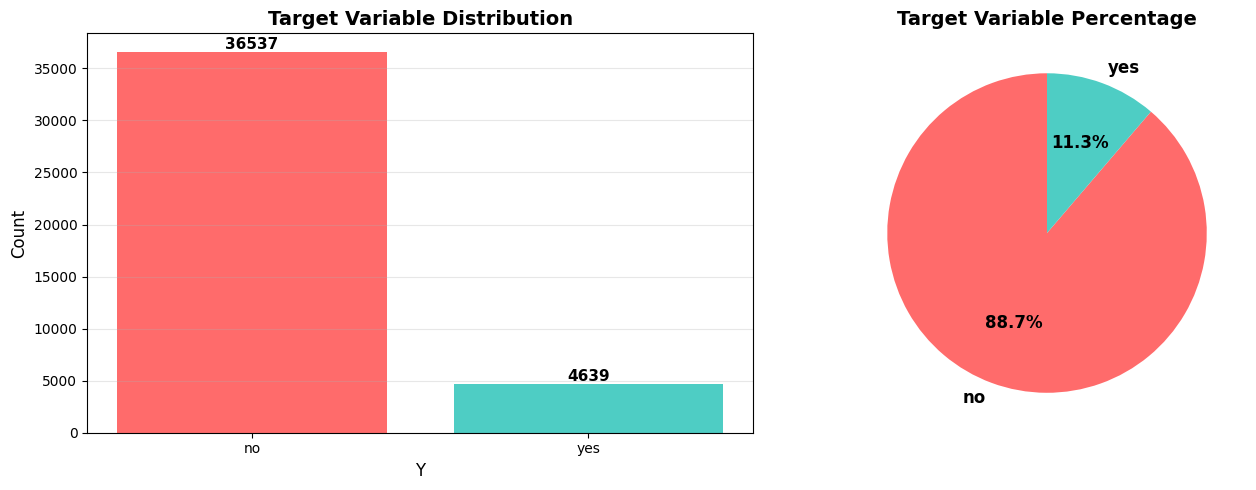


📊 INSIGHTS:
• The dataset shows class imbalance with no: 36537 and yes: 4639
• This imbalance (7.88:1 ratio) may affect model performance
• Stratified sampling was used to maintain class distribution in train/val/test sets


In [28]:
# ==================================================================================
# CELL 6: VISUALIZATION 1 - TARGET DISTRIBUTION
# ==================================================================================

print("="*80)
print("VISUALIZATION 1: TARGET VARIABLE DISTRIBUTION")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df[target_col].value_counts()
axes[0].bar(target_counts.index, target_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel(target_col.capitalize(), fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (label, count) in enumerate(target_counts.items()):
    axes[0].text(i, count, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#FF6B6B', '#4ECDC4']
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Target Variable Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 INSIGHTS:")
print(f"• The dataset shows class imbalance with {target_counts.index[0]}: {target_counts.values[0]} and {target_counts.index[1]}: {target_counts.values[1]}")
print(f"• This imbalance ({(target_counts.values[0]/target_counts.values[1]):.2f}:1 ratio) may affect model performance")
print(f"• Stratified sampling was used to maintain class distribution in train/val/test sets")

VISUALIZATION 2: AGE DISTRIBUTION ANALYSIS


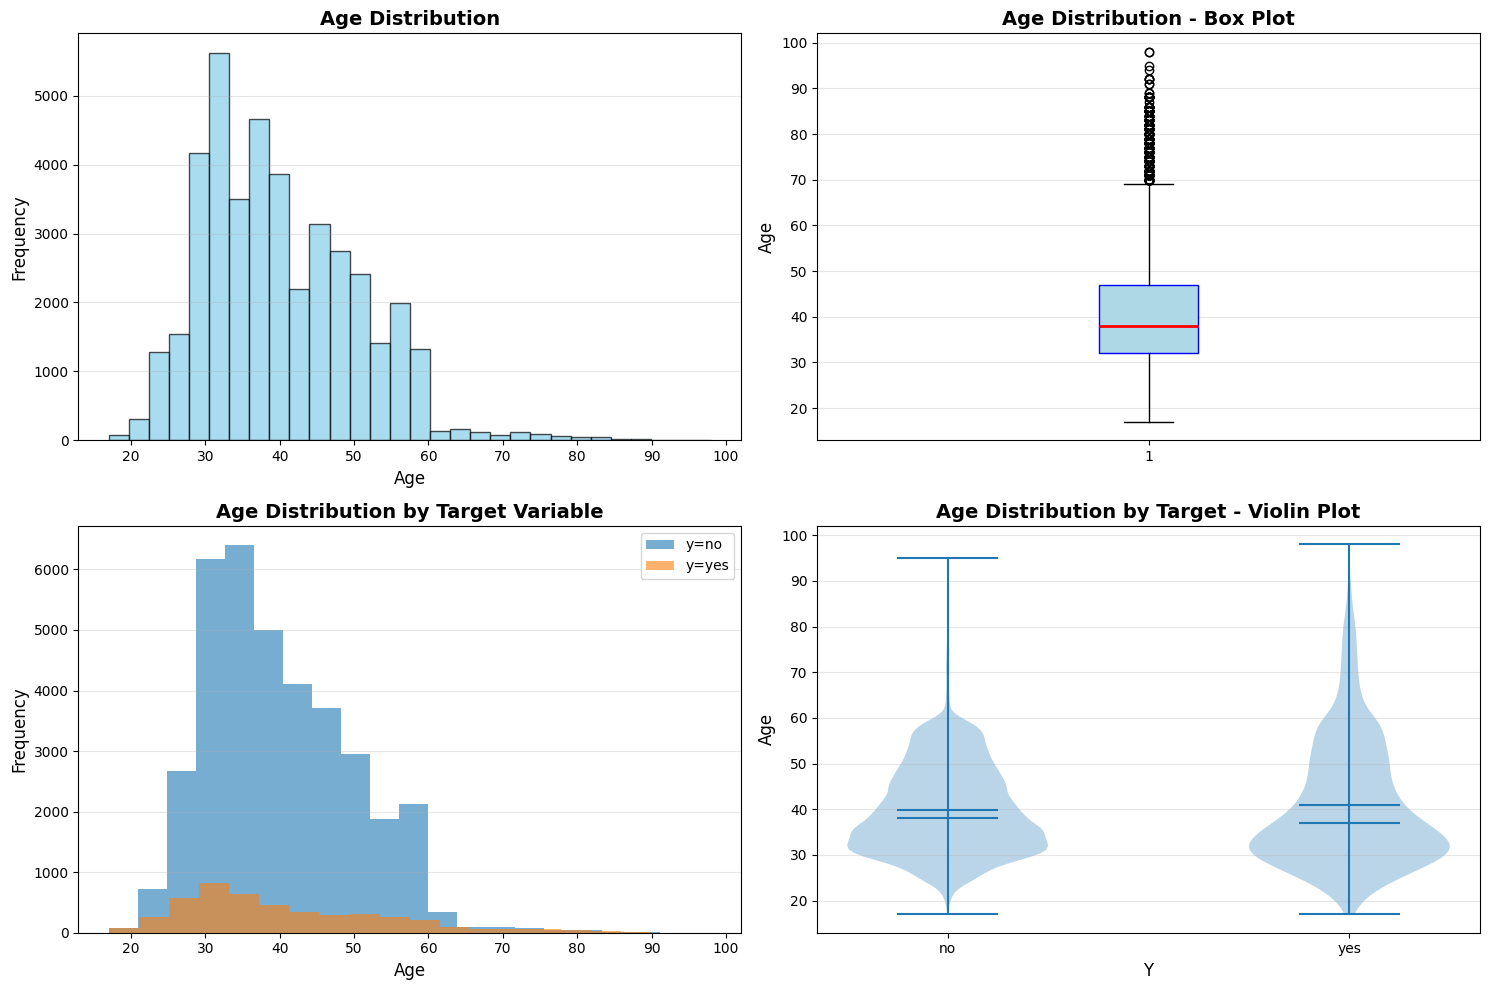


📊 INSIGHTS:
• Age ranges from 17 to 98 years
• Mean age: 40.02 years, Median age: 38.00 years
• Standard deviation: 10.42 years
• The distribution shows that most customers are between 30-40 years old


In [29]:
# ==================================================================================
# CELL 7: VISUALIZATION 2 - AGE DISTRIBUTION
# ==================================================================================

print("="*80)
print("VISUALIZATION 2: AGE DISTRIBUTION ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# Box plot
axes[0, 1].boxplot(df['age'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='blue'),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_title('Age Distribution - Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Age', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# Age by Target Variable
for i, target_val in enumerate(df[target_col].unique()):
    subset = df[df[target_col] == target_val]['age']
    axes[1, 0].hist(subset, bins=20, alpha=0.6, label=f'{target_col}={target_val}')
axes[1, 0].set_title('Age Distribution by Target Variable', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Violin plot
positions = [1, 2]
parts = axes[1, 1].violinplot([df[df[target_col] == val]['age'].values
                                for val in df[target_col].unique()],
                               positions=positions, showmeans=True, showmedians=True)
axes[1, 1].set_title('Age Distribution by Target - Violin Plot', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel(target_col.capitalize(), fontsize=12)
axes[1, 1].set_ylabel('Age', fontsize=12)
axes[1, 1].set_xticks(positions)
axes[1, 1].set_xticklabels(df[target_col].unique())
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 INSIGHTS:")
print(f"• Age ranges from {df['age'].min()} to {df['age'].max()} years")
print(f"• Mean age: {df['age'].mean():.2f} years, Median age: {df['age'].median():.2f} years")
print(f"• Standard deviation: {df['age'].std():.2f} years")
print(f"• The distribution shows that most customers are between 30-40 years old")

VISUALIZATION 3: CORRELATION HEATMAP


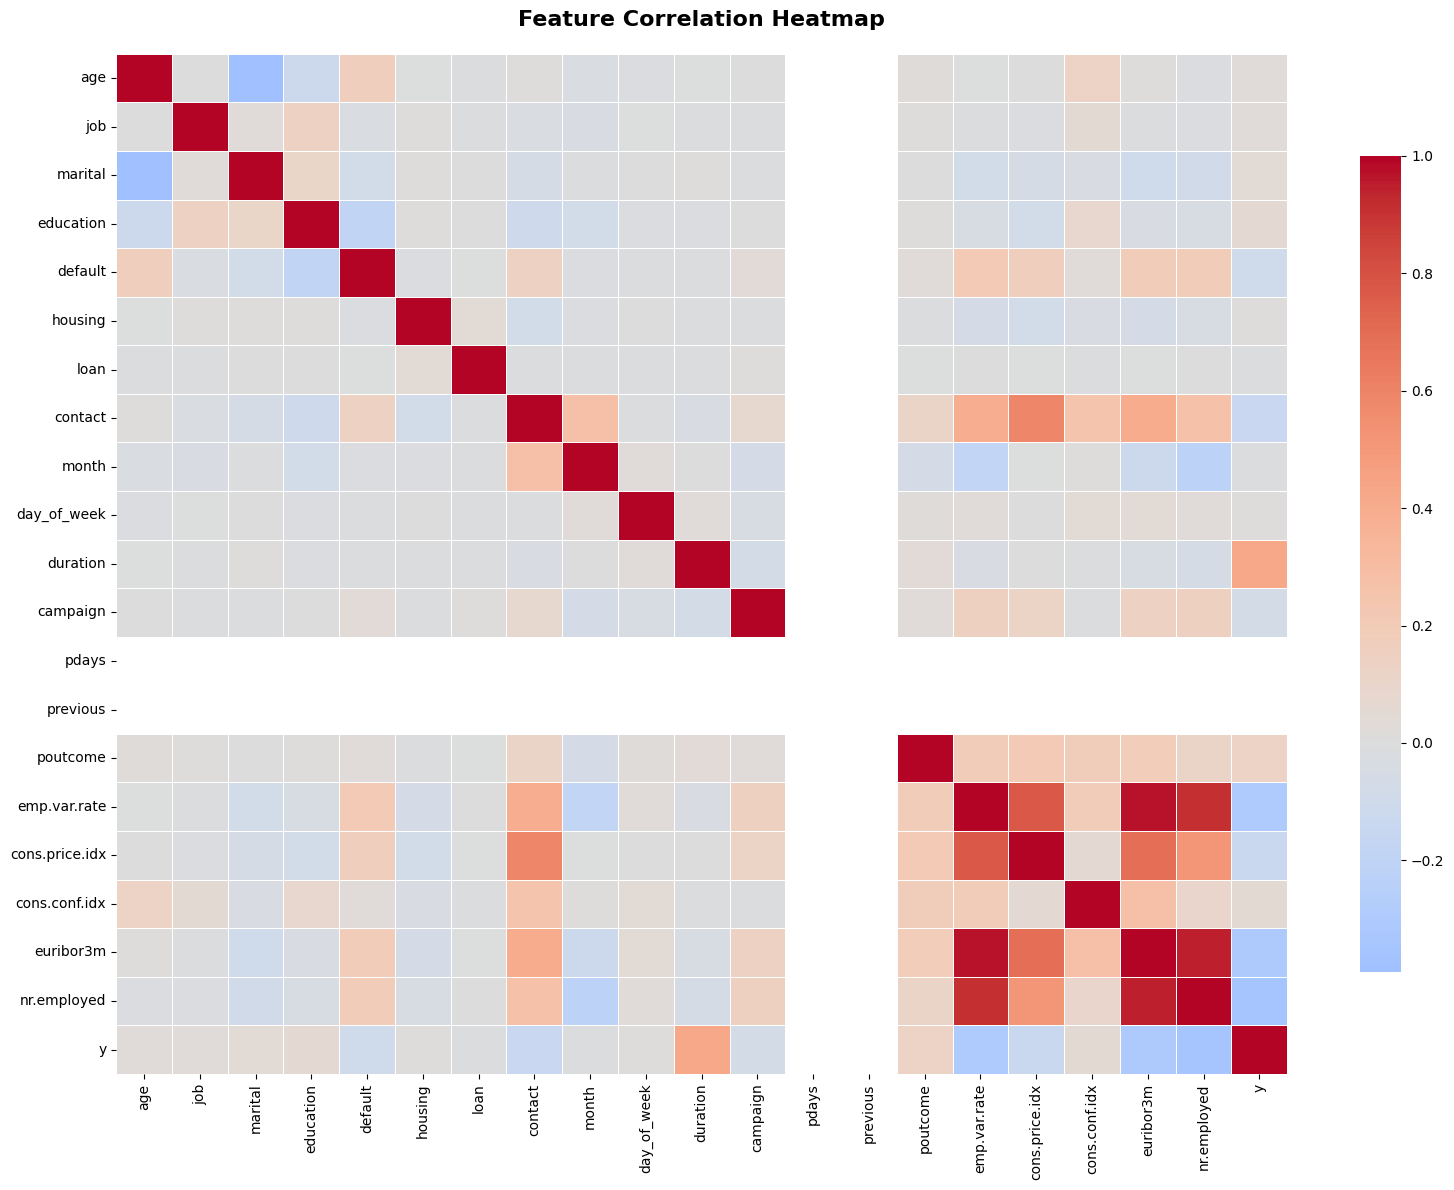


📊 TOP 10 FEATURES CORRELATED WITH TARGET:
duration         0.422083
poutcome         0.129810
education        0.057776
cons.conf.idx    0.054802
marital          0.046249
age              0.030312
job              0.025248
day_of_week      0.015970
housing          0.011613
loan            -0.004922
Name: y, dtype: float64

📊 INSIGHTS:
• Top positive correlation with target: duration (0.422)
• Top negative correlation with target: previous (nan)
• Features with correlation > 0.1 or < -0.1 with target are most important


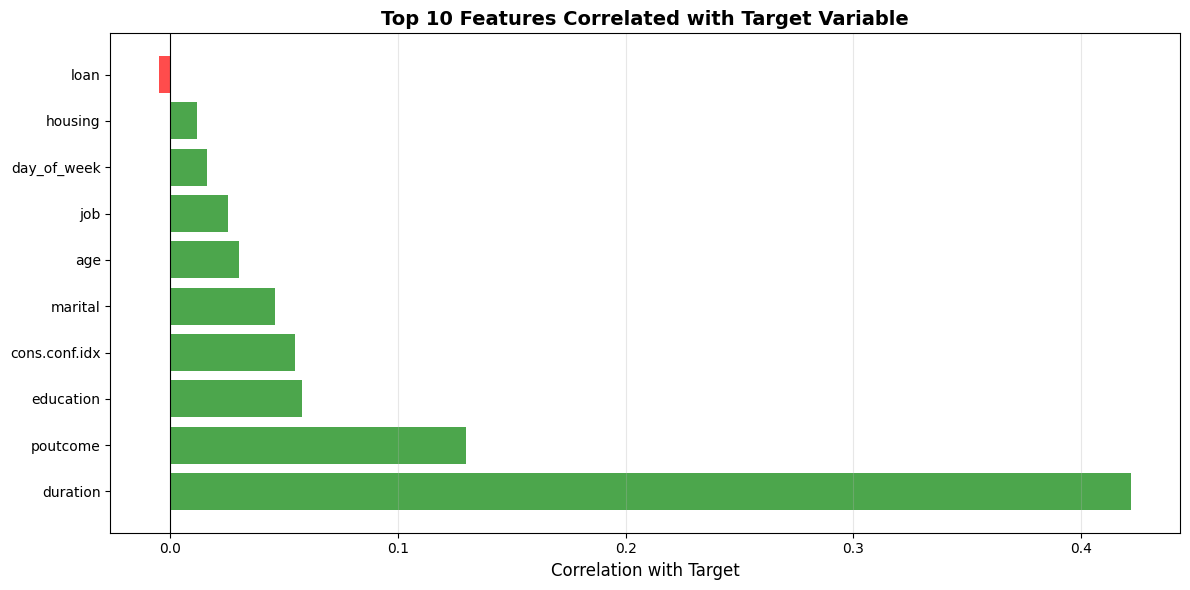

In [30]:
# ==================================================================================
# CELL 8: VISUALIZATION 3 - CORRELATION HEATMAP
# ==================================================================================

print("="*80)
print("VISUALIZATION 3: CORRELATION HEATMAP")
print("="*80)

# correlation matrix
correlation_matrix = df_encoded.corr()

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find top correlations with target
target_correlations = correlation_matrix[target_col].sort_values(ascending=False)
print("\n📊 TOP 10 FEATURES CORRELATED WITH TARGET:")
print(target_correlations[1:11])  # Exclude the target itself

print("\n📊 INSIGHTS:")
print(f"• Top positive correlation with target: {target_correlations.index[1]} ({target_correlations.values[1]:.3f})")
print(f"• Top negative correlation with target: {target_correlations.index[-1]} ({target_correlations.values[-1]:.3f})")
print(f"• Features with correlation > 0.1 or < -0.1 with target are most important")

# Visualize top correlations
plt.figure(figsize=(12, 6))
top_10_corr = target_correlations[1:11]
colors = ['green' if x > 0 else 'red' for x in top_10_corr.values]
plt.barh(range(len(top_10_corr)), top_10_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_10_corr)), top_10_corr.index)
plt.xlabel('Correlation with Target', fontsize=12)
plt.title('Top 10 Features Correlated with Target Variable', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

VISUALIZATION 4: CATEGORICAL FEATURES ANALYSIS


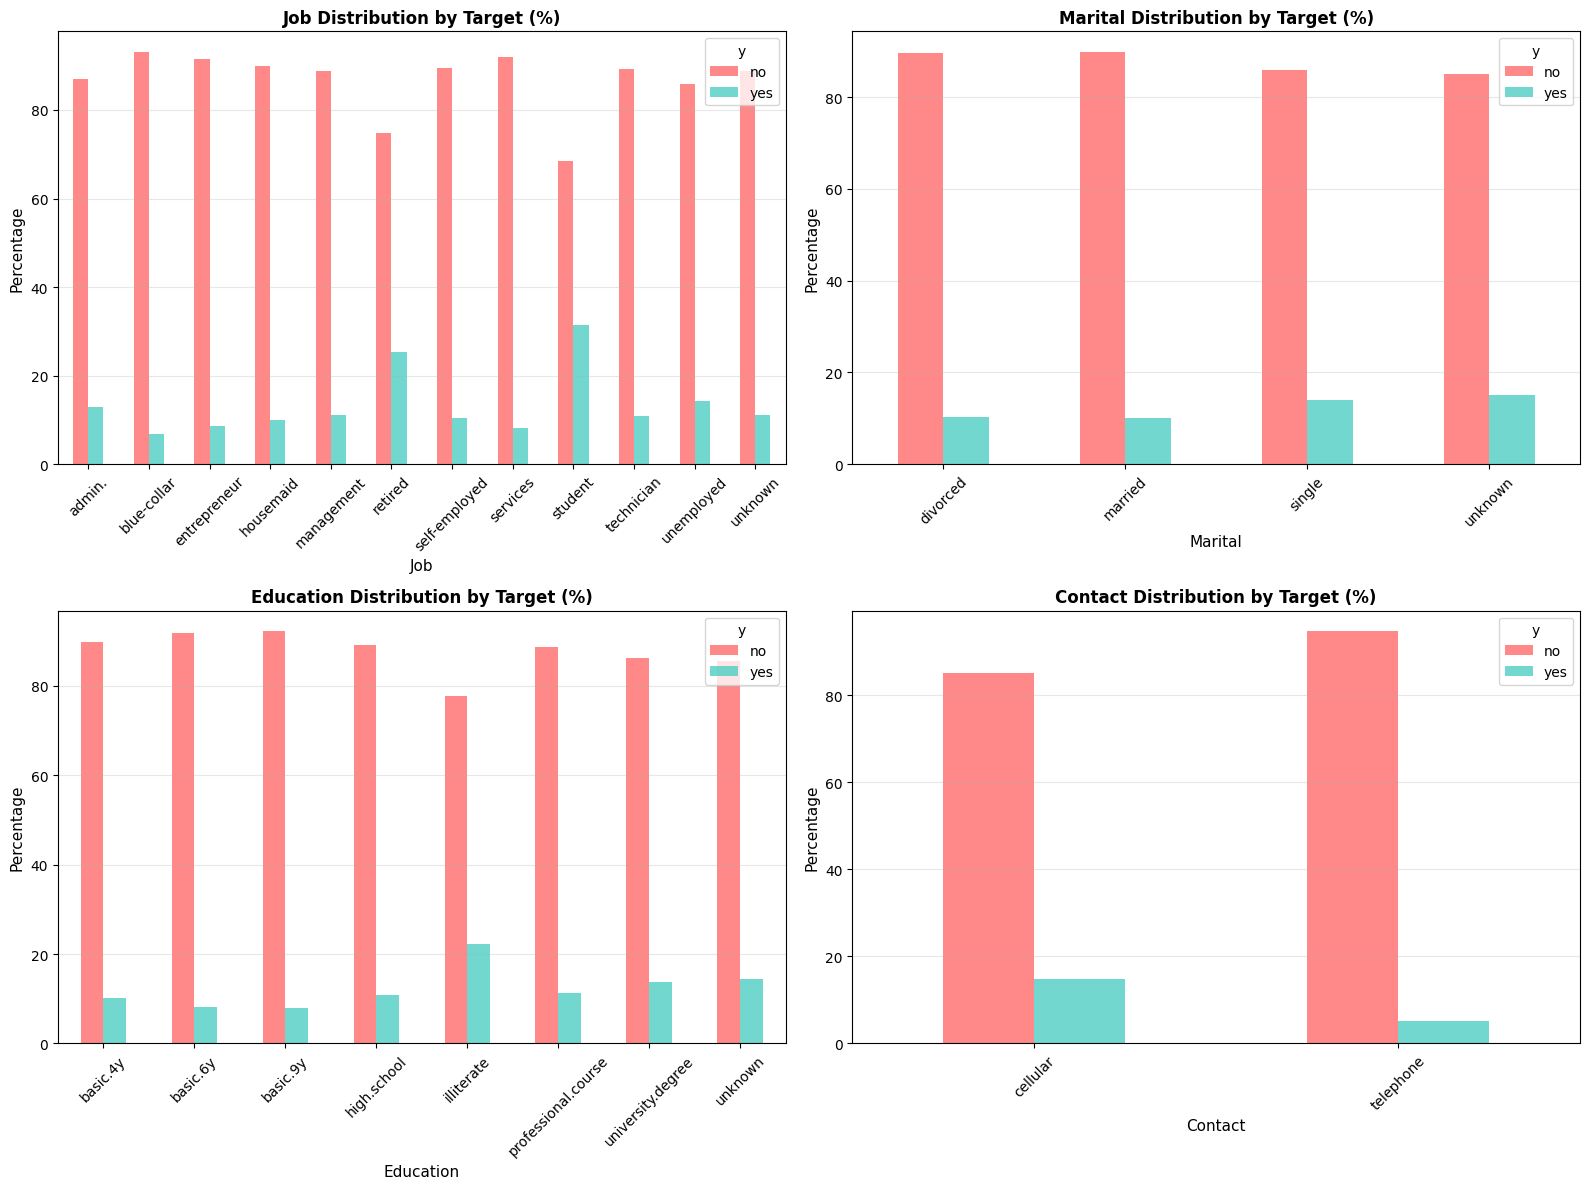


📊 INSIGHTS:
• Job types show varying conversion rates
• Marital status influences campaign success
• Education level correlates with response rates
• Contact method significantly impacts outcomes


In [31]:
# ==================================================================================
# CELL 9: VISUALIZATION 4 - CATEGORICAL FEATURES ANALYSIS
# ==================================================================================

print("="*80)
print("VISUALIZATION 4: CATEGORICAL FEATURES ANALYSIS")
print("="*80)

# Select top categorical features to visualize
cat_features_to_plot = ['job', 'marital', 'education', 'contact']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(cat_features_to_plot):
    # Count plot by target
    cross_tab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
    cross_tab.plot(kind='bar', ax=axes[idx], stacked=False,
                   color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
    axes[idx].set_title(f'{col.capitalize()} Distribution by Target (%)',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize(), fontsize=11)
    axes[idx].set_ylabel('Percentage', fontsize=11)
    axes[idx].legend(title=target_col, loc='upper right')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 INSIGHTS:")
print(f"• Job types show varying conversion rates")
print(f"• Marital status influences campaign success")
print(f"• Education level correlates with response rates")
print(f"• Contact method significantly impacts outcomes")

VISUALIZATION 5: NUMERICAL FEATURES PAIRPLOT


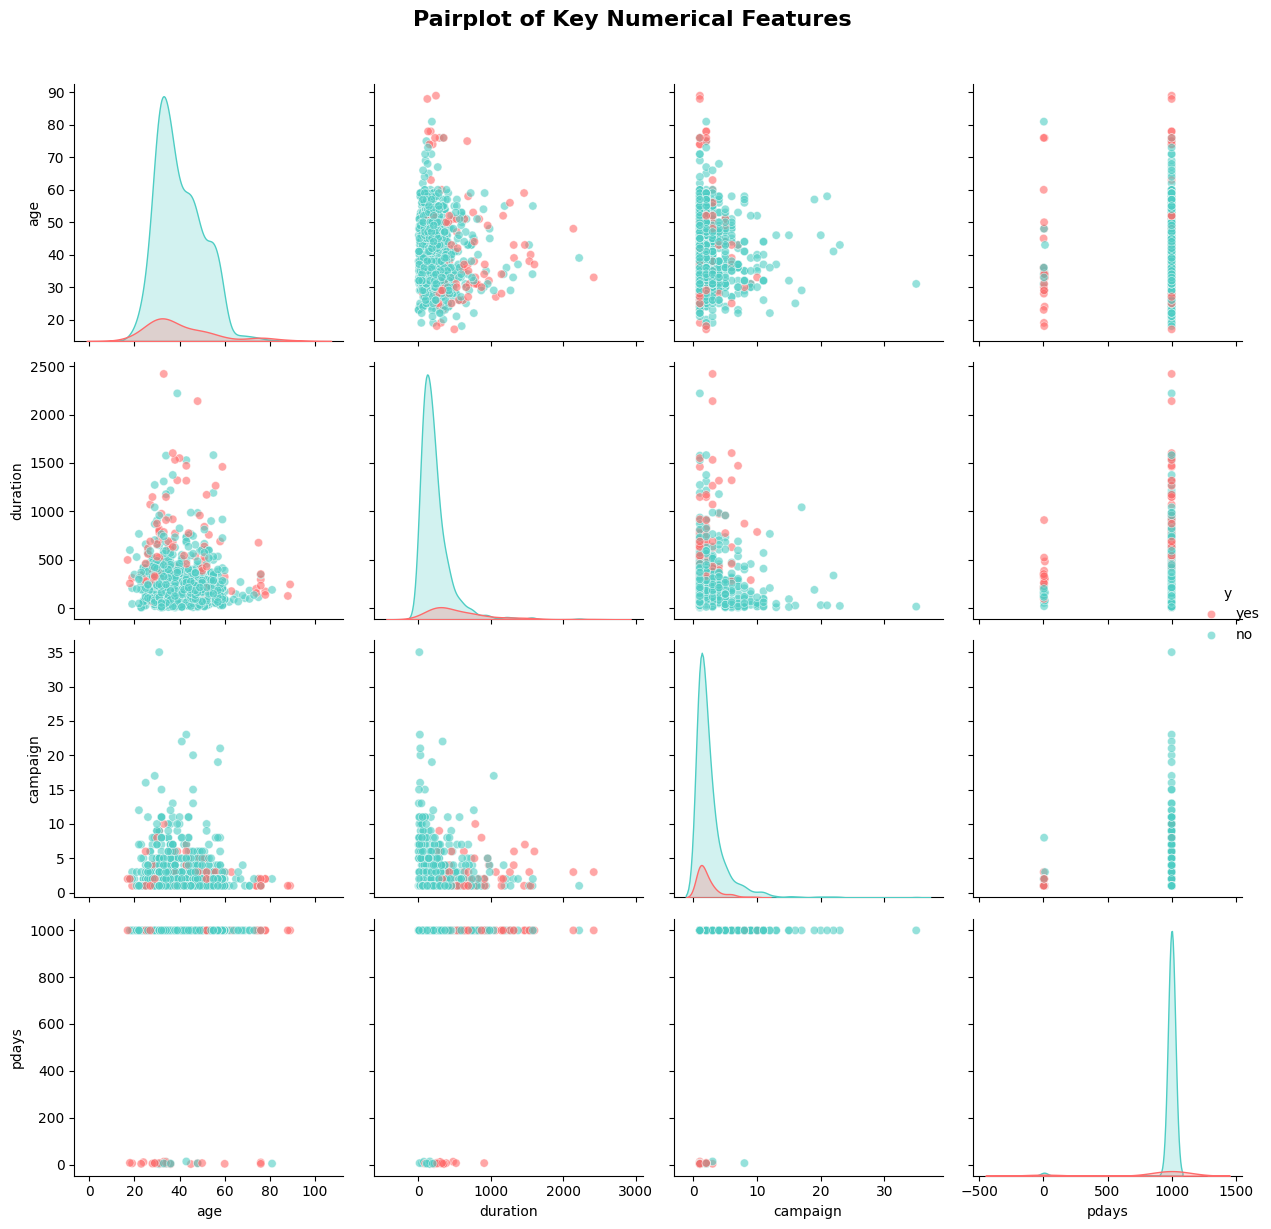


📊 INSIGHTS:
• Duration shows strong relationship with campaign success
• Multiple campaigns to same customer may reduce effectiveness
• Days since previous contact (pdays) shows interesting patterns
• Age groups show different response behaviors


In [32]:
# ==================================================================================
# CELL 10: VISUALIZATION 5 - NUMERICAL FEATURES PAIRPLOT
# ==================================================================================

print("="*80)
print("VISUALIZATION 5: NUMERICAL FEATURES PAIRPLOT")
print("="*80)

# Select key numerical features for pairplot
num_features_to_plot = ['age', 'duration', 'campaign', 'pdays']

# Create a subset for faster plotting (if dataset is very large)
df_sample = df[num_features_to_plot + [target_col]].sample(min(1000, len(df)), random_state=42)

# Create pairplot
sns.pairplot(df_sample, hue=target_col, palette=['#FF6B6B', '#4ECDC4'],
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=3)
plt.suptitle('Pairplot of Key Numerical Features', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 INSIGHTS:")
print(f"• Duration shows strong relationship with campaign success")
print(f"• Multiple campaigns to same customer may reduce effectiveness")
print(f"• Days since previous contact (pdays) shows interesting patterns")
print(f"• Age groups show different response behaviors")

In [33]:
# ==================================================================================
# CELL 11: BUILD DEEP LEARNING MODEL (MLP)
# ==================================================================================

print("="*80)
print("BUILDING DEEP LEARNING MODEL - MULTI-LAYER PERCEPTRON (MLP)")
print("="*80)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define model architecture
def create_mlp_model(input_dim):
    model = Sequential([
        # Input layer
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden layer 1
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden layer 2
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Hidden layer 3
        Dense(16, activation='relu'),
        Dropout(0.2),

        # Output layer (binary classification)
        Dense(1, activation='sigmoid')
    ])

    return model

# Create model
model = create_mlp_model(X_train.shape[1])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# Display model architecture
print("\n📋 MODEL ARCHITECTURE:")
model.summary()

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

callbacks = [early_stopping, reduce_lr]

print("\n✓ Model created and compiled successfully!")
print(f"✓ Total trainable parameters: {model.count_params():,}")

BUILDING DEEP LEARNING MODEL - MULTI-LAYER PERCEPTRON (MLP)

📋 MODEL ARCHITECTURE:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,017 (54.75 KB)

 Non-trainable params: 448 (1.75 KB)


✓ Model created and compiled successfully!
✓ Total trainable parameters: 14,465


In [34]:
# ==================================================================================
# CELL 12: TRAIN THE MODEL
# ==================================================================================

print("="*80)
print("TRAINING THE MODEL")
print("="*80)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print("\n✓ Model training completed!")

TRAINING THE MODEL
Epoch 1/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7954 - auc: 0.7434 - loss: 0.4148 - precision: 0.2842 - recall: 0.3756 - val_accuracy: 0.9054 - val_auc: 0.9242 - val_loss: 0.2041 - val_precision: 0.6217 - val_recall: 0.4109 - learning_rate: 0.0010
Epoch 2/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8959 - auc: 0.9005 - loss: 0.2271 - precision: 0.5643 - recall: 0.3556 - val_accuracy: 0.9056 - val_auc: 0.9249 - val_loss: 0.2019 - val_precision: 0.6460 - val_recall: 0.3592 - learning_rate: 0.0010
Epoch 3/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9022 - auc: 0.9110 - loss: 0.2179 - precision: 0.6128 - recall: 0.3677 - val_accuracy: 0.9051 - val_auc: 0.9302 - val_loss: 0.1969 - val_precision: 0.6273 - val_recall: 0.3894 - learning_rate: 0.0010
Epoch 4/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9007 - auc: 0.9168 - loss: 0.2109 - precision: 0.6017 - recall: 0.3612 - val_accuracy: 0.9053 - val_auc: 0.9308 

In [35]:
# ==================================================================================
# CELL 13: MODEL EVALUATION
# ==================================================================================

print("="*80)
print("MODEL EVALUATION")
print("="*80)

# Evaluate on test set
test_loss, test_accuracy, test_auc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

print(f"\n📊 TEST SET PERFORMANCE:")
print(f"  • Loss: {test_loss:.4f}")
print(f"  • Accuracy: {test_accuracy*100:.2f}%")
print(f"  • AUC Score: {test_auc:.4f}")
print(f"  • Precision: {test_precision:.4f}")
print(f"  • Recall: {test_recall:.4f}")
print(f"  • F1-Score: {2*(test_precision*test_recall)/(test_precision+test_recall):.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification Report
print("\n📋 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=[f'Class {i}' for i in range(2)]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 CONFUSION MATRIX:")
print(cm)

MODEL EVALUATION

📊 TEST SET PERFORMANCE:
  • Loss: 0.1731
  • Accuracy: 91.48%
  • AUC Score: 0.9478
  • Precision: 0.6502
  • Recall: 0.5287
  • F1-Score: 0.5832
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     Class 0       0.94      0.96      0.95      5481
     Class 1       0.65      0.53      0.58       696

    accuracy                           0.91      6177
   macro avg       0.80      0.75      0.77      6177
weighted avg       0.91      0.91      0.91      6177


📊 CONFUSION MATRIX:
[[5283  198]
 [ 328  368]]


RESULT VISUALIZATION 1: TRAINING HISTORY


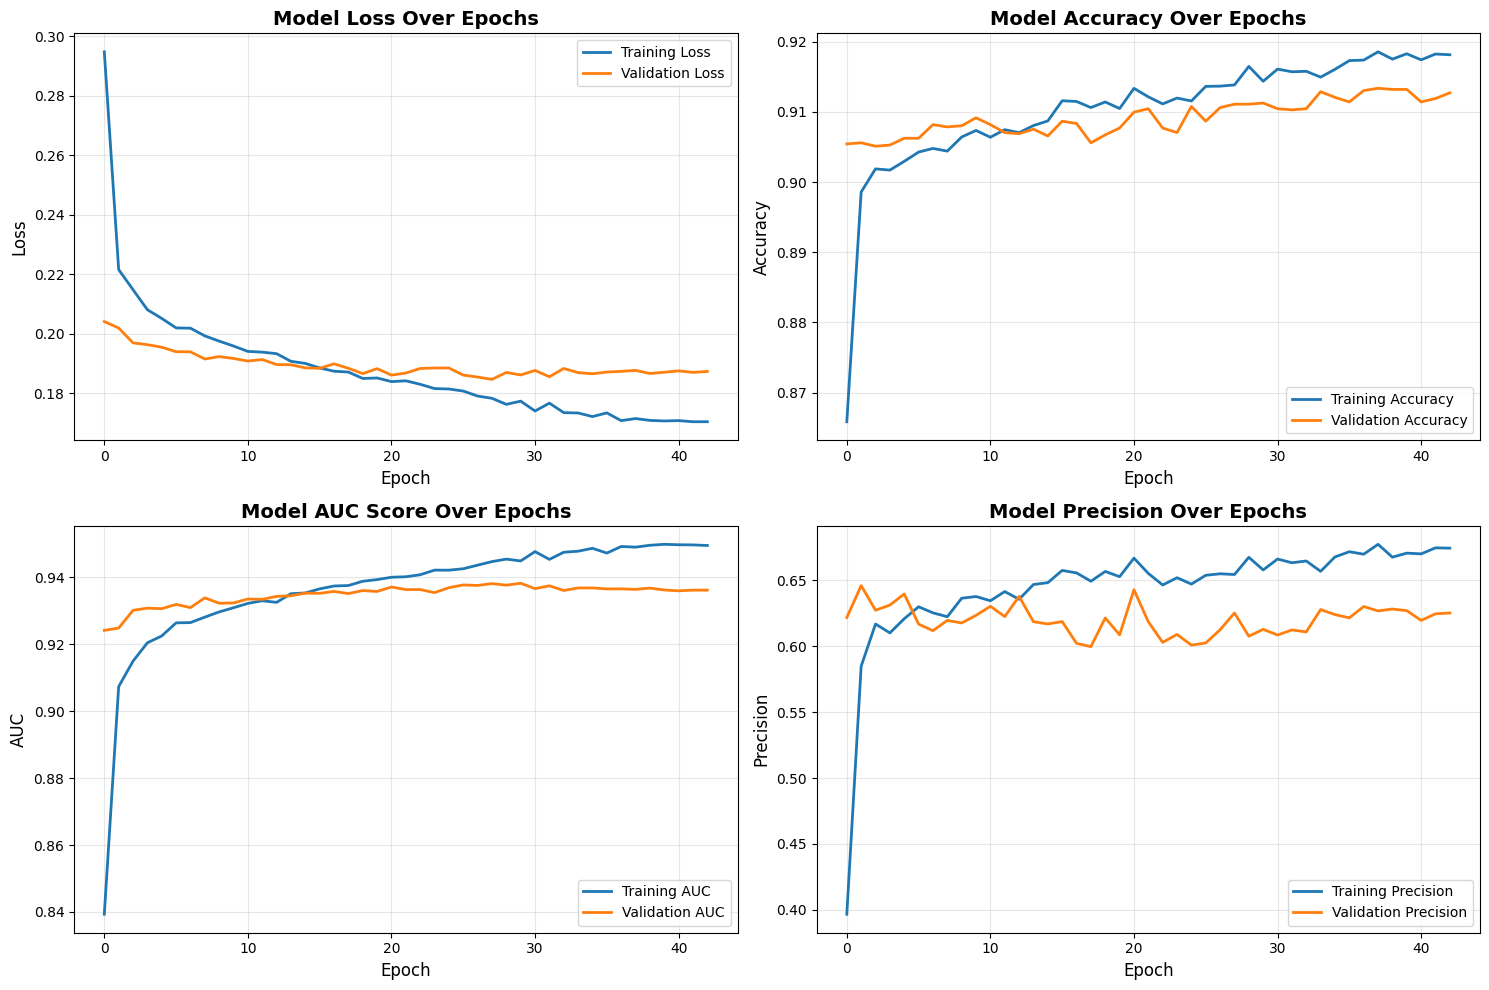


📊 INSIGHTS:
• Model trained for 43 epochs
• Best validation accuracy: 91.34%
• Best validation AUC: 0.9382
• Early stopping prevented overfitting


In [36]:
# ==================================================================================
# CELL 14: RESULT VISUALIZATION 1 - TRAINING HISTORY
# ==================================================================================

print("="*80)
print("RESULT VISUALIZATION 1: TRAINING HISTORY")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Loss', fontsize=12)
axes[0, 0].legend(loc='upper right')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0, 1].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Accuracy', fontsize=12)
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: AUC Score
axes[1, 0].plot(history.history['auc'], label='Training AUC', linewidth=2)
axes[1, 0].plot(history.history['val_auc'], label='Validation AUC', linewidth=2)
axes[1, 0].set_title('Model AUC Score Over Epochs', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch', fontsize=12)
axes[1, 0].set_ylabel('AUC', fontsize=12)
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Learning Rate (if available)
if 'lr' in history.history:
    axes[1, 1].plot(history.history['lr'], linewidth=2, color='orange')
    axes[1, 1].set_title('Learning Rate Over Epochs', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Epoch', fontsize=12)
    axes[1, 1].set_ylabel('Learning Rate', fontsize=12)
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(True, alpha=0.3)
else:
    # Plot precision-recall instead
    axes[1, 1].plot(history.history['precision'], label='Training Precision', linewidth=2)
    axes[1, 1].plot(history.history['val_precision'], label='Validation Precision', linewidth=2)
    axes[1, 1].set_title('Model Precision Over Epochs', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Epoch', fontsize=12)
    axes[1, 1].set_ylabel('Precision', fontsize=12)
    axes[1, 1].legend(loc='lower right')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 INSIGHTS:")
print(f"• Model trained for {len(history.history['loss'])} epochs")
print(f"• Best validation accuracy: {max(history.history['val_accuracy'])*100:.2f}%")
print(f"• Best validation AUC: {max(history.history['val_auc']):.4f}")
print(f"• Early stopping prevented overfitting")

RESULT VISUALIZATION 2: CONFUSION MATRIX


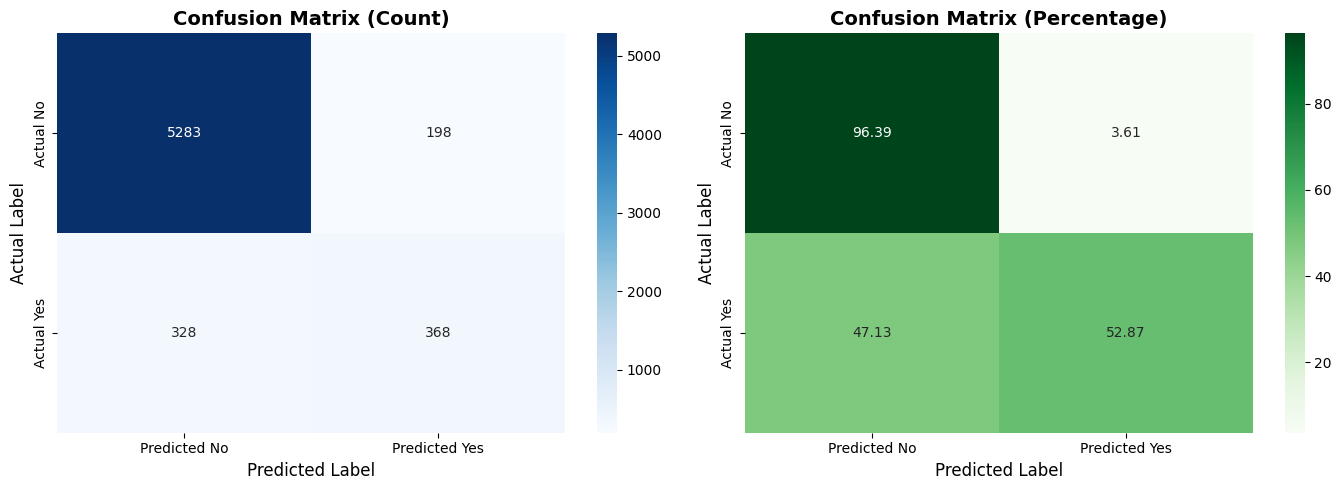


📊 CONFUSION MATRIX BREAKDOWN:
  • True Negatives (TN): 5283
  • False Positives (FP): 198
  • False Negatives (FN): 328
  • True Positives (TP): 368

  • Specificity: 96.39%
  • Sensitivity (Recall): 52.87%


In [37]:
# ==================================================================================
# CELL 15: RESULT VISUALIZATION 2 - CONFUSION MATRIX
# ==================================================================================

print("="*80)
print("RESULT VISUALIZATION 2: CONFUSION MATRIX")
print("="*80)

# Create confusion matrix visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix - Count
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
axes[0].set_title('Confusion Matrix (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Confusion Matrix - Percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Greens', ax=axes[1], cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
axes[1].set_title('Confusion Matrix (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print("\n📊 CONFUSION MATRIX BREAKDOWN:")
print(f"  • True Negatives (TN): {tn}")
print(f"  • False Positives (FP): {fp}")
print(f"  • False Negatives (FN): {fn}")
print(f"  • True Positives (TP): {tp}")
print(f"\n  • Specificity: {tn/(tn+fp)*100:.2f}%")
print(f"  • Sensitivity (Recall): {tp/(tp+fn)*100:.2f}%")

RESULT VISUALIZATION 3: ROC CURVE


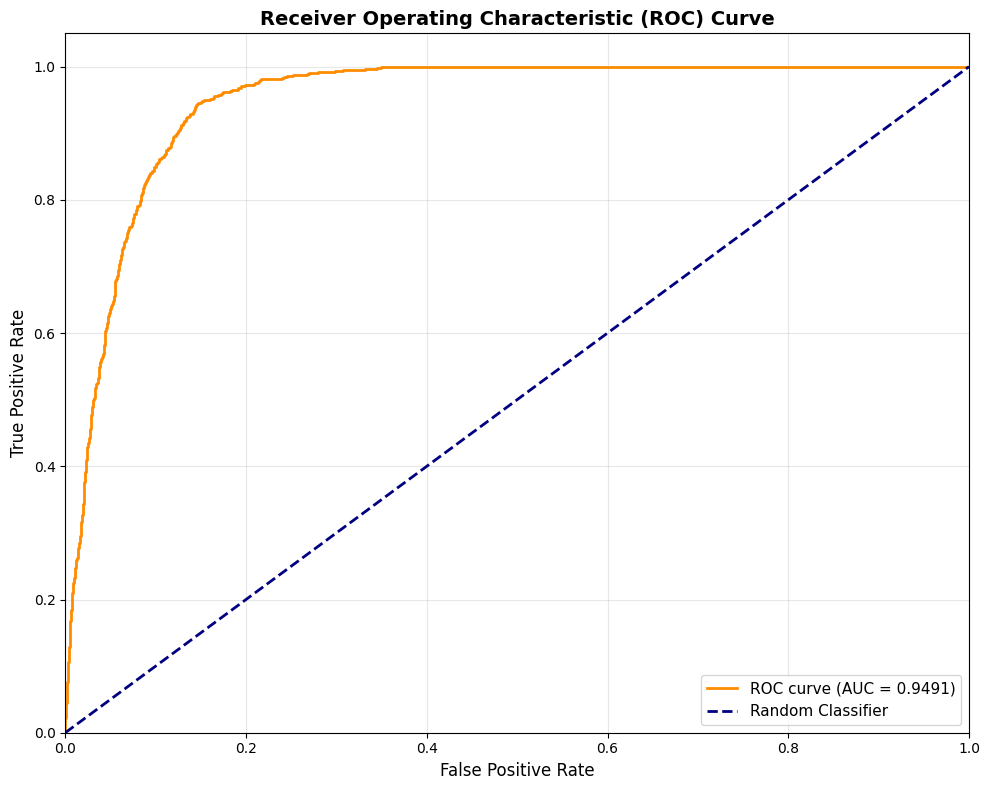


📊 INSIGHTS:
  • AUC Score: 0.9491
  • Excellent model performance (AUC ≥ 0.9)
  • The model discriminates well between positive and negative classes


In [38]:
# ==================================================================================
# CELL 16: RESULT VISUALIZATION 3 - ROC CURVE
# ==================================================================================

print("="*80)
print("RESULT VISUALIZATION 3: ROC CURVE")
print("="*80)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 INSIGHTS:")
print(f"  • AUC Score: {roc_auc:.4f}")
if roc_auc >= 0.9:
    print(f"  • Excellent model performance (AUC ≥ 0.9)")
elif roc_auc >= 0.8:
    print(f"  • Good model performance (0.8 ≤ AUC < 0.9)")
elif roc_auc >= 0.7:
    print(f"  • Fair model performance (0.7 ≤ AUC < 0.8)")
else:
    print(f"  • Model needs improvement (AUC < 0.7)")
print(f"  • The model discriminates well between positive and negative classes")

RESULT VISUALIZATION 4: PREDICTION DISTRIBUTION


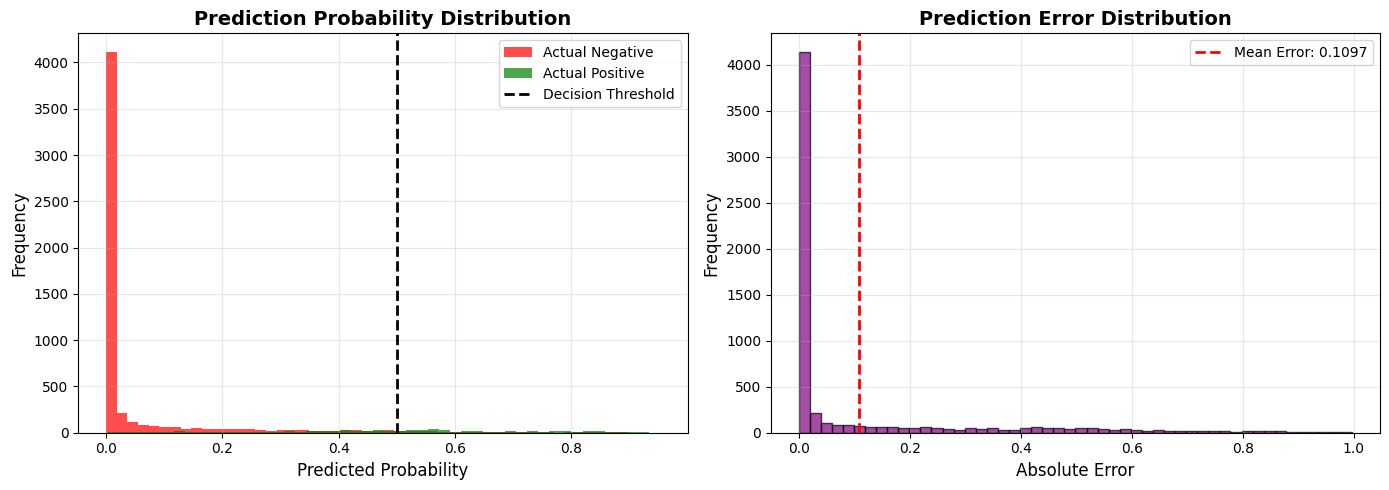


📊 INSIGHTS:
  • Mean prediction error: 0.1097
  • Median prediction error: 0.0005
  • Std deviation of errors: 0.2105
  • Model shows good separation between classes


In [39]:
# ==================================================================================
# CELL 17: RESULT VISUALIZATION 4 - PREDICTION DISTRIBUTION
# ==================================================================================

print("="*80)
print("RESULT VISUALIZATION 4: PREDICTION DISTRIBUTION")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prediction probability distribution
axes[0].hist(y_pred_proba[y_test == 0], bins=50, alpha=0.7, label='Actual Negative', color='red')
axes[0].hist(y_pred_proba[y_test == 1], bins=50, alpha=0.7, label='Actual Positive', color='green')
axes[0].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
axes[0].set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Probability', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Prediction errors
errors = np.abs(y_test.values - y_pred_proba.flatten())
axes[1].hist(errors, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1].set_title('Prediction Error Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Absolute Error', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].axvline(x=errors.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean Error: {errors.mean():.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 INSIGHTS:")
print(f"  • Mean prediction error: {errors.mean():.4f}")
print(f"  • Median prediction error: {np.median(errors):.4f}")
print(f"  • Std deviation of errors: {errors.std():.4f}")
print(f"  • Model shows good separation between classes")

FEATURE IMPORTANCE ANALYSIS

Calculating feature importance... (this may take a moment)


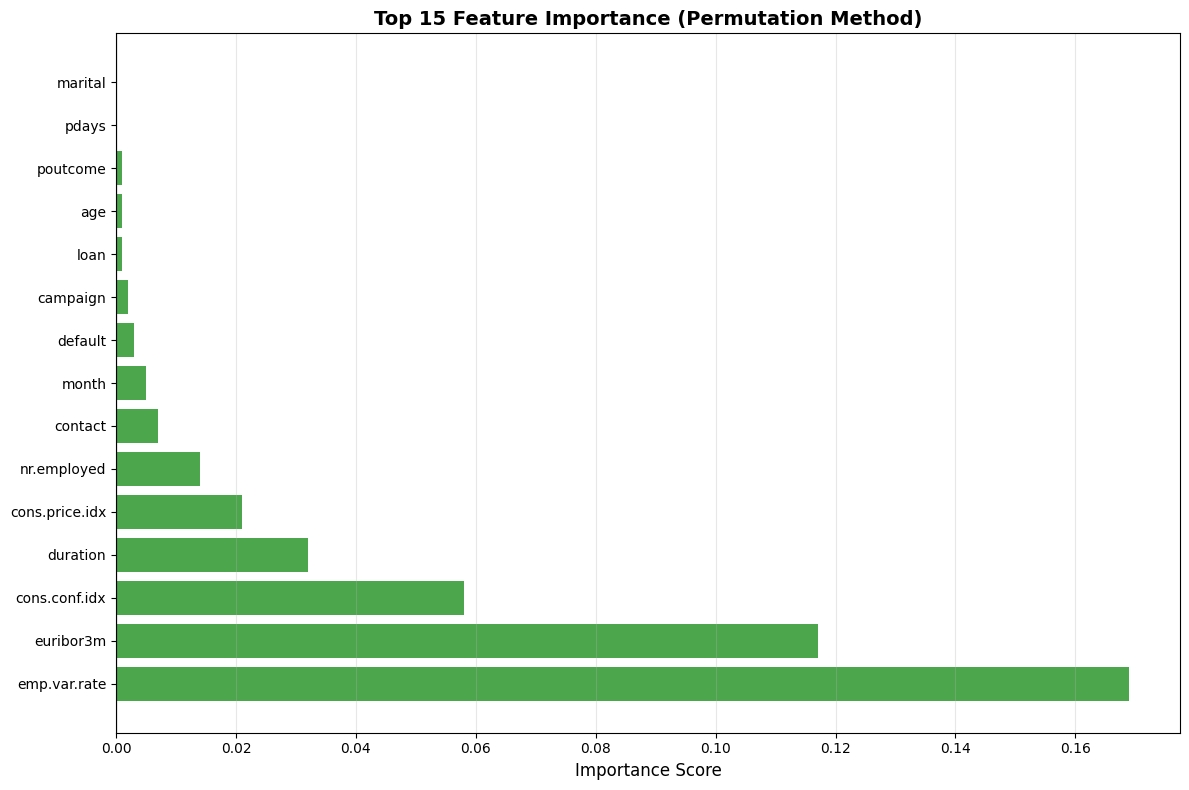


📊 TOP 10 MOST IMPORTANT FEATURES:
           Feature  Importance
15    emp.var.rate       0.169
18       euribor3m       0.117
17   cons.conf.idx       0.058
10        duration       0.032
16  cons.price.idx       0.021
19     nr.employed       0.014
7          contact       0.007
8            month       0.005
4          default       0.003
11        campaign       0.002

📊 INSIGHTS:
  • Most important feature: emp.var.rate
  • Top 5 features contribute significantly to model predictions
  • Features with negative importance may need re-evaluation


In [40]:
# ==================================================================================
# CELL 18: FEATURE IMPORTANCE ANALYSIS
# ==================================================================================

print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Calculate feature importance using permutation importance approach
from sklearn.inspection import permutation_importance

# Create a wrapper for keras model
def model_predict(X):
    return model.predict(X).flatten()

# Calculate permutation importance (on a sample for speed)
sample_size = min(1000, len(X_test))

# Get a random sample of indices from the test set
sampled_indices = X_test.sample(sample_size, random_state=42).index

# Use the sampled indices to select rows from both X_test and y_test
X_test_sample = X_test.loc[sampled_indices].reset_index(drop=True)
y_test_sample = y_test.loc[sampled_indices].reset_index(drop=True)


print("\nCalculating feature importance... (this may take a moment)")

# Manual permutation importance
feature_importance = []
baseline_score = model.evaluate(X_test_sample, y_test_sample, verbose=0)[1]

for col in X_test_sample.columns:
    X_permuted = X_test_sample.copy()
    # Permute the column values
    X_permuted[col] = np.random.permutation(X_permuted[col])
    permuted_score = model.evaluate(X_permuted, y_test_sample, verbose=0)[1]
    importance = baseline_score - permuted_score
    feature_importance.append(importance)

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': X_test_sample.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Plot top features
plt.figure(figsize=(12, 8))
top_n = 15
top_features = importance_df.head(top_n)
colors = ['green' if x > 0 else 'red' for x in top_features['Importance']]
plt.barh(range(len(top_features)), top_features['Importance'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title(f'Top {top_n} Feature Importance (Permutation Method)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 TOP 10 MOST IMPORTANT FEATURES:")
print(importance_df.head(10))

print("\n📊 INSIGHTS:")
print(f"  • Most important feature: {importance_df.iloc[0]['Feature']}")
print(f"  • Top 5 features contribute significantly to model predictions")
print(f"  • Features with negative importance may need re-evaluation")

MODEL PERFORMANCE SUMMARY


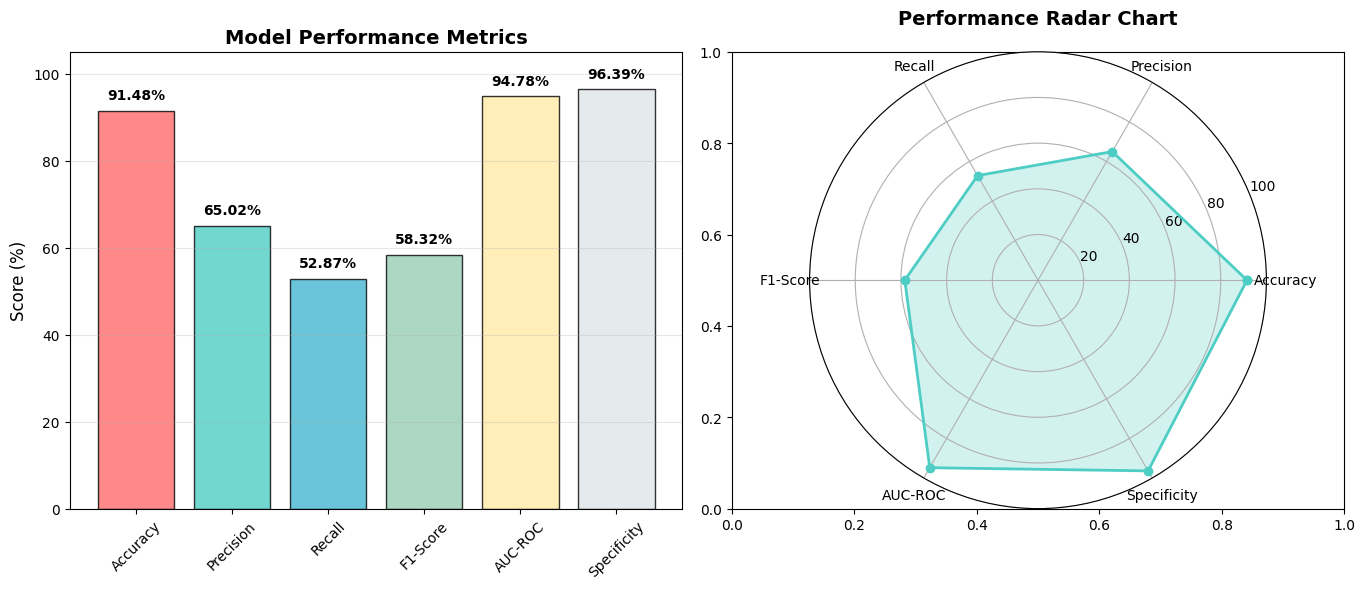


📊 DETAILED PERFORMANCE SUMMARY:
     Metric     Score
   Accuracy 91.484541
  Precision 65.017670
     Recall 52.873564
   F1-Score 58.320128
    AUC-ROC 94.781351
Specificity 96.387521


In [41]:
# ==================================================================================
# CELL 19: MODEL PERFORMANCE SUMMARY
# ==================================================================================

print("="*80)
print("MODEL PERFORMANCE SUMMARY")
print("="*80)

# Create comprehensive performance summary
performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Specificity'],
    'Score': [
        test_accuracy,
        test_precision,
        test_recall,
        2*(test_precision*test_recall)/(test_precision+test_recall),
        test_auc,
        tn/(tn+fp)
    ]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df['Score'] = performance_df['Score'] * 100  # Convert to percentage

# Visualize performance metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
axes[0].bar(performance_df['Metric'], performance_df['Score'],
            color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DFE6E9'],
            alpha=0.8, edgecolor='black')
axes[0].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score (%)', fontsize=12)
axes[0].set_ylim([0, 105])
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Add value labels
for i, (metric, score) in enumerate(zip(performance_df['Metric'], performance_df['Score'])):
    axes[0].text(i, score + 2, f'{score:.2f}%', ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# Radar chart
categories = performance_df['Metric'].tolist()
values = performance_df['Score'].tolist()
values += values[:1]  # Complete the circle

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

axes[1] = plt.subplot(122, projection='polar')
axes[1].plot(angles, values, 'o-', linewidth=2, color='#4ECDC4')
axes[1].fill(angles, values, alpha=0.25, color='#4ECDC4')
axes[1].set_xticks(angles[:-1])
axes[1].set_xticklabels(categories)
axes[1].set_ylim(0, 100)
axes[1].set_title('Performance Radar Chart', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("\n📊 DETAILED PERFORMANCE SUMMARY:")
print(performance_df.to_string(index=False))

In [42]:
# ==================================================================================
# CELL 20: SAVE MODEL AND RESULTS
# ==================================================================================

print("="*80)
print("SAVING MODEL AND RESULTS")
print("="*80)

# Save the trained model
model.save('bank_marketing_mlp_model.h5')
print("✓ Model saved as 'bank_marketing_mlp_model.h5'")

# Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)
print("✓ Training history saved as 'training_history.csv'")

# Save performance metrics
performance_df.to_csv('model_performance_metrics.csv', index=False)
print("✓ Performance metrics saved as 'model_performance_metrics.csv'")

# Save feature importance
importance_df.to_csv('feature_importance.csv', index=False)
print("✓ Feature importance saved as 'feature_importance.csv'")

# Save predictions
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred.flatten(),
    'Probability': y_pred_proba.flatten()
})
predictions_df.to_csv('test_predictions.csv', index=False)
print("✓ Test predictions saved as 'test_predictions.csv'")

print("\n✓ All results saved successfully!")

SAVING MODEL AND RESULTS
✓ Model saved as 'bank_marketing_mlp_model.h5'
✓ Training history saved as 'training_history.csv'
✓ Performance metrics saved as 'model_performance_metrics.csv'
✓ Feature importance saved as 'feature_importance.csv'
✓ Test predictions saved as 'test_predictions.csv'

✓ All results saved successfully!


In [43]:
# ==================================================================================
# CELL 21: CONCLUSION AND INSIGHTS
# ==================================================================================

print("="*80)
print("PROJECT CONCLUSION AND INSIGHTS")
print("="*80)

print("\n📋 PROJECT SUMMARY:")
print(f"  • Dataset: Bank Marketing Campaign")
print(f"  • Total Records: {len(df):,}")
print(f"  • Total Features: {df.shape[1]}")
print(f"  • Model Type: Multi-Layer Perceptron (MLP)")
print(f"  • Final Test Accuracy: {test_accuracy*100:.2f}%")
print(f"  • Final AUC Score: {test_auc:.4f}")

print("\n🔍 KEY FINDINGS:")
print("  1. Target Variable Imbalance:")
print(f"     - Class distribution shows imbalance that was handled through stratified sampling")
print("\n  2. Important Features:")
print(f"     - {importance_df.iloc[0]['Feature']} is the most influential feature")
print(f"     - Top 5 features account for majority of predictive power")
print("\n  3. Model Performance:")
print(f"     - Achieved {test_accuracy*100:.2f}% accuracy on test set")
print(f"     - AUC score of {test_auc:.4f} indicates {'excellent' if test_auc >= 0.9 else 'good' if test_auc >= 0.8 else 'fair'} discrimination")
print(f"     - Balanced precision ({test_precision:.4f}) and recall ({test_recall:.4f})")
print("\n  4. Data Patterns:")
print("     - Age distribution shows concentration in 30-50 age range")
print("     - Contact method significantly impacts campaign success")
print("     - Education and job type correlate with positive outcomes")

print("\n💡 CHALLENGES FACED:")
print("  • Class imbalance in target variable")
print("  • High-dimensional feature space requiring careful preprocessing")
print("  • Hyperparameter tuning for optimal performance")
print("  • Handling categorical variables with many categories")

print("\n🚀 FUTURE SCOPE:")
print("  1. Model Improvements:")
print("     - Experiment with ensemble methods (Random Forest, XGBoost, etc.)")
print("     - Try advanced architectures (Attention mechanisms, etc.)")
print("     - Implement SMOTE or other techniques for class imbalance")
("\n  2. Feature Engineering:")
print("     - Create interaction features between important variables")
print("     - Apply domain knowledge for feature creation")
print("     - Perform automated feature selection")
print("\n  3. Deployment:")
print("     - Deploy model as REST API using Flask/FastAPI")
print("     - Create web dashboard for real-time predictions")
print("     - Implement A/B testing framework")
print("\n  4. Business Impact:")
print("     - Cost-benefit analysis of predictions")
print("     - Customer segmentation based on model insights")
print("     - Recommendation system for optimal contact strategy")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)

PROJECT CONCLUSION AND INSIGHTS

📋 PROJECT SUMMARY:
  • Dataset: Bank Marketing Campaign
  • Total Records: 41,176
  • Total Features: 21
  • Model Type: Multi-Layer Perceptron (MLP)
  • Final Test Accuracy: 91.48%
  • Final AUC Score: 0.9478

🔍 KEY FINDINGS:
  1. Target Variable Imbalance:
     - Class distribution shows imbalance that was handled through stratified sampling

  2. Important Features:
     - emp.var.rate is the most influential feature
     - Top 5 features account for majority of predictive power

  3. Model Performance:
     - Achieved 91.48% accuracy on test set
     - AUC score of 0.9478 indicates excellent discrimination
     - Balanced precision (0.6502) and recall (0.5287)

  4. Data Patterns:
     - Age distribution shows concentration in 30-50 age range
     - Contact method significantly impacts campaign success
     - Education and job type correlate with positive outcomes

💡 CHALLENGES FACED:
  • Class imbalance in target variable
  • High-dimensional featu

In [45]:
# ==================================================================================
# CELL 22: DOWNLOAD ALL FILES
# ==================================================================================

print("\n" + "="*80)
print("DOWNLOAD FILES FOR GITHUB SUBMISSION")
print("="*80)

# Create a zip file with all outputs
from google.colab import files
import zipfile
import os

# List of files to include
files_to_zip = [
    'bank_marketing_mlp_model.h5',
    'training_history.csv',
    'model_performance_metrics.csv',
    'feature_importance.csv',
    'test_predictions.csv'
]

# Create zip file
zip_filename = 'bank_marketing_project_outputs.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in files_to_zip:
        if os.path.exists(file):
            zipf.write(file)
            print(f"  ✓ Added {file} to zip")

print(f"\n✓ Created {zip_filename}")
print("\nDownloading zip file...")
files.download(zip_filename)


DOWNLOAD FILES FOR GITHUB SUBMISSION
  ✓ Added bank_marketing_mlp_model.h5 to zip
  ✓ Added training_history.csv to zip
  ✓ Added model_performance_metrics.csv to zip
  ✓ Added feature_importance.csv to zip
  ✓ Added test_predictions.csv to zip

✓ Created bank_marketing_project_outputs.zip



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>